<a href="https://colab.research.google.com/github/sperezg6/file_qa/blob/main/File_QA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Document Questioning Answering




Instalamos las librerias necesarias

In [ ]:
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install json
!pip install csv
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.7 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


Cargamos el dataset de DocvQA



In [ ]:
import pandas as pd
import json
import csv
import os

In [ ]:
from datasets import load_dataset

dataset = load_dataset("SantiagoPG/doc_qa")



Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
import pandas as pd

# Convert the 'train' split to a DataFrame
dataset.set_format(type='pandas')
dataset = dataset['train'][:]

# Display the first few rows of the DataFrame
print(dataset.head())


   questionId                                           question    doc_id  \
0         337         what is the date mentioned in this letter?  xnbl0037   
1         338  what is the contact person name mentioned in l...  xnbl0037   
2         339            Which corporation's letterhead is this?  mxcj0037   
3         340                      Who is in  cc in this letter?  mxcj0037   
4         341               what is the subject of  this letter?  mxcj0037   

                         page_ids  \
0  ['xnbl0037_p0', 'xnbl0037_p1']   
1  ['xnbl0037_p0', 'xnbl0037_p1']   
2                 ['mxcj0037_p0']   
3                 ['mxcj0037_p0']   
4                 ['mxcj0037_p0']   

                                          answers  answer_page_idx data_split  
0                                      ['1/8/93']                0      train  
1                      ['P. Carter', 'p. carter']                0      train  
2      ['Brown & Williamson Tobacco Corporation']                0  

Eliminamos la columna data_split

In [ ]:
dataset = dataset.drop(columns=['data_split'])
dataset.head()

,questionId,question,doc_id,page_ids,answers,answer_page_idx
0,337,what is the date mentioned in this letter?,xnbl0037,"['xnbl0037_p0', 'xnbl0037_p1']",['1/8/93'],0
1,338,what is the contact person name mentioned in l...,xnbl0037,"['xnbl0037_p0', 'xnbl0037_p1']","['P. Carter', 'p. carter']",0
2,339,Which corporation's letterhead is this?,mxcj0037,['mxcj0037_p0'],['Brown & Williamson Tobacco Corporation'],0
3,340,Who is in cc in this letter?,mxcj0037,['mxcj0037_p0'],['T.F. Riehl'],0
4,341,what is the subject of this letter?,mxcj0037,['mxcj0037_p0'],['Review of existing Brainstorming Ideas/483'],0


In [ ]:
# Function to clean the data
def clean_column(data):
    # Check if the data is a string that starts with '[' and ends with ']'
    if isinstance(data, str) and data.startswith('[') and data.endswith(']'):
        # Remove the brackets and extra quotes
        return data[1:-1].replace("'", "")
    return data

# Apply this function to your DataFrame columns
dataset['page_ids'] = dataset['page_ids'].apply(clean_column)
dataset['answers'] = dataset['answers'].apply(clean_column)



In [ ]:
dataset.head()

,questionId,question,doc_id,page_ids,answers,answer_page_idx
0,337,what is the date mentioned in this letter?,xnbl0037,"xnbl0037_p0, xnbl0037_p1",1/8/93,0
1,338,what is the contact person name mentioned in l...,xnbl0037,"xnbl0037_p0, xnbl0037_p1","P. Carter, p. carter",0
2,339,Which corporation's letterhead is this?,mxcj0037,mxcj0037_p0,Brown & Williamson Tobacco Corporation,0
3,340,Who is in cc in this letter?,mxcj0037,mxcj0037_p0,T.F. Riehl,0
4,341,what is the subject of this letter?,mxcj0037,mxcj0037_p0,Review of existing Brainstorming Ideas/483,0


In [ ]:
# Basic Info
print("Dataset shape:", dataset.shape)
print("Data Types:\n", dataset.dtypes)
print("Missing values:\n", dataset.isnull().sum())


Dataset shape: (36230, 6)
Data Types:
 questionId          int64
question           object
doc_id             object
page_ids           object
answers            object
answer_page_idx     int64
dtype: object
Missing values:
 questionId         0
question           0
doc_id             0
page_ids           0
answers            0
answer_page_idx    0
dtype: int64


In [ ]:
# Descriptive Statistics
print("Summary:\n", dataset.describe())


Summary:
          questionId  answer_page_idx
count  36230.000000     36230.000000
mean   30611.159095         3.921833
std    17359.294168         5.775035
min      337.000000         0.000000
25%    15702.500000         0.000000
50%    30966.500000         1.000000
75%    44646.750000         5.000000
max    65450.000000        20.000000


In [ ]:
# Unique Counts
print("Unique Questions:", dataset['questionId'].nunique())
print("Unique Documents:", dataset['doc_id'].nunique())


Unique Questions: 36230
Unique Documents: 5131


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

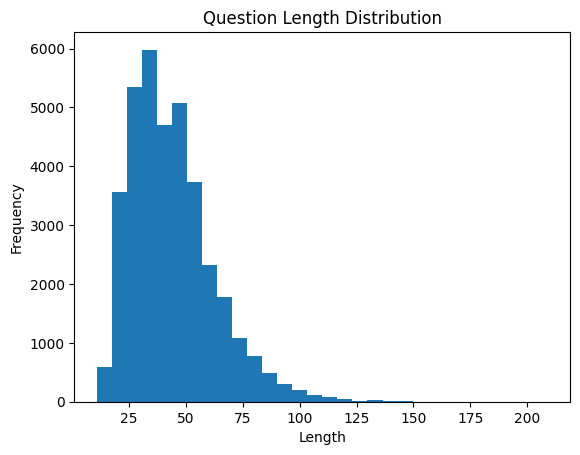

In [ ]:
# Question Length Analysis
dataset['question_length'] = dataset['question'].apply(len)
plt.hist(dataset['question_length'], bins=30)
plt.title('Question Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


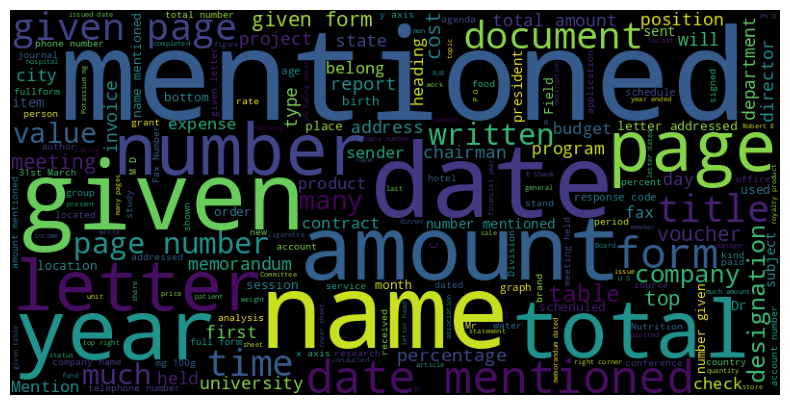

In [ ]:
# Word Cloud for Questions
text = ' '.join(dataset['question'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from datasets import load_dataset

dataset = load_dataset("SantiagoPG/ocr_texts")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# Convert the 'train' split to a DataFrame
dataset.set_format(type='pandas')
dataset = dataset['train'][:]

# Display the first few rows of the DataFrame
print(dataset.head())

   questionId                                           question    doc_id  \
0         337         what is the date mentioned in this letter?  xnbl0037   
1         338  what is the contact person name mentioned in l...  xnbl0037   
2         339            Which corporation's letterhead is this?  mxcj0037   
3         340                      Who is in  cc in this letter?  mxcj0037   
4         341               what is the subject of  this letter?  mxcj0037   

                   page_ids                                     answers  \
0  xnbl0037_p0, xnbl0037_p1                                      1/8/93   
1  xnbl0037_p0, xnbl0037_p1                        P. Carter, p. carter   
2               mxcj0037_p0      Brown & Williamson Tobacco Corporation   
3               mxcj0037_p0                                  T.F. Riehl   
4               mxcj0037_p0  Review of existing Brainstorming Ideas/483   

   answer_page_idx                                           doc_text  
0       

In [ ]:
dataset.columns

Index(['questionId', 'question', 'doc_id', 'page_ids', 'answers',
       'answer_page_idx', 'doc_text'],
      dtype='object')

In [ ]:
import re

def clean_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        # If text is None or NaN, you might want to return a blank string
        # return ''
        # Or, convert it to a string (this depends on your specific use case)
        text = str(text)

    # Remove URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Standardize whitespace
    text = ' '.join(text.split())

    # Additional cleaning rules can be added here

    return text

# Apply the cleaning function to your document texts
dataset['doc_text'] = dataset['doc_text'].apply(clean_text)


In [ ]:
dataset.shape

(36230, 7)

In [ ]:
# Remove rows where 'doc_text' is NaN
dataset = dataset.dropna(subset=['doc_text'])


In [ ]:
dataset.shape

(36230, 7)

In [ ]:
dataset.head()

,questionId,question,doc_id,page_ids,answers,answer_page_idx,doc_text
0,337,what is the date mentioned in this letter?,xnbl0037,"xnbl0037_p0, xnbl0037_p1",1/8/93,0,camel special Lights statement and Q&As Decemb...
1,338,what is the contact person name mentioned in l...,xnbl0037,"xnbl0037_p0, xnbl0037_p1","P. Carter, p. carter",0,camel special Lights statement and Q&As Decemb...
2,339,Which corporation's letterhead is this?,mxcj0037,mxcj0037_p0,Brown & Williamson Tobacco Corporation,0,B&W BROWN & WILLIAMSON TOBACCO CORPORATION RES...
3,340,Who is in cc in this letter?,mxcj0037,mxcj0037_p0,T.F. Riehl,0,B&W BROWN & WILLIAMSON TOBACCO CORPORATION RES...
4,341,what is the subject of this letter?,mxcj0037,mxcj0037_p0,Review of existing Brainstorming Ideas/483,0,B&W BROWN & WILLIAMSON TOBACCO CORPORATION RES...


##Modelo

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer
from transformers import AutoModelForDocumentQuestionAnswering
from sklearn.model_selection import train_test_split


tokenizer = AutoTokenizer.from_pretrained("impira/layoutlm-document-qa")
model = AutoModelForDocumentQuestionAnswering.from_pretrained("impira/layoutlm-document-qa")


tokenizer_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/789 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/511M [00:00<?, ?B/s]

In [ ]:


tokenizer1 = AutoTokenizer.from_pretrained("impira/layoutlm-document-qa")
model1 = AutoModelForDocumentQuestionAnswering.from_pretrained("impira/layoutlm-document-qa")

In [ ]:
import torch

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")


Using GPU: Tesla V100-SXM2-16GB


In [ ]:
def tokenize_and_format(dataset, batch_size=32):
    input_ids = []
    attention_masks = []
    start_positions = []
    end_positions = []

    # Pre-compute a single placeholder encoding
    placeholder_encoding = tokenizer.encode_plus(
        "", "",  # Empty strings for text and answer
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors="pt"
    )
    placeholder_ids = placeholder_encoding['input_ids'][0].tolist()
    placeholder_mask = placeholder_encoding['attention_mask'][0].tolist()

    for i in range(0, len(dataset), batch_size):
        batch_end = min(i + batch_size, len(dataset))
        batch_questions = []
        batch_texts = []
        batch_answers = []

        for j in range(i, batch_end):
            if not isinstance(dataset['doc_text'][j], str) or not isinstance(dataset['answers'][j], str):
                input_ids.append(placeholder_ids)
                attention_masks.append(placeholder_mask)
                start_positions.append(0)
                end_positions.append(0)
            else:
                batch_questions.append(dataset['question'][j])
                batch_texts.append(dataset['doc_text'][j])
                batch_answers.append(dataset['answers'][j])

        if batch_questions:  # Check if the batch is not empty
            encodings = tokenizer(batch_questions, batch_texts,
                                  max_length=512,
                                  padding='max_length',
                                  truncation=True,
                                  return_tensors="pt",
                                  return_offsets_mapping=True)

            for k in range(len(batch_questions)):
                input_ids.append(encodings['input_ids'][k].tolist())
                attention_masks.append(encodings['attention_mask'][k].tolist())

                answer = batch_answers[k]
                start_char = batch_texts[k].find(answer)
                end_char = start_char + len(answer)

                start_token, end_token = None, None
                for idx, (start, end) in enumerate(encodings['offset_mapping'][k]):
                    if start_token is None and start <= start_char < end:
                        start_token = idx
                    if start < end_char <= end:
                        end_token = idx
                        break

                if start_token is None or end_token is None:
                    start_token, end_token = 0, 0  # Default positions

                start_positions.append(start_token)
                end_positions.append(end_token)

    return {
        'input_ids': torch.tensor(input_ids),
        'attention_masks': torch.tensor(attention_masks),
        'start_positions': torch.tensor(start_positions),
        'end_positions': torch.tensor(end_positions)
    }

tokenized_dataset = tokenize_and_format(dataset)



In [ ]:

print(len(tokenized_dataset['input_ids']))
print(len(tokenized_dataset['attention_masks']))
print(len(tokenized_dataset['start_positions']))
print(len(tokenized_dataset['end_positions']))


36230
36230
36230
36230


In [ ]:
class QADataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
        # Verify that all parts of encodings have the same length
        self.len = len(encodings['input_ids'])
        assert all(len(encodings[key]) == self.len for key in encodings), "Mismatch in lengths of encoding components"


    def __getitem__(self, idx):
        return {key: val[idx].clone().detach() for key, val in self.encodings.items()}

    def __len__(self):
        return self.len

# Initialize the dataset
train_dataset = QADataset(tokenized_dataset)



In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)



In [ ]:
from transformers import AdamW

# Assuming you have a model instance
model = model.to(device)  # Move model to GPU if available
optimizer = AdamW(model.parameters(), lr=5e-5)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import torch
from tqdm.auto import tqdm
# Number of training epochs
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch in progress_bar:
        # Move batch to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_masks'].to(device)  # Make sure key matches in QADataset
        start_positions = batch['start_positions'].to(device)
        end_positions = batch['end_positions'].to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask,
                        start_positions=start_positions, end_positions=end_positions)

        # Loss calculation
        loss = outputs.loss
        total_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update progress bar
        progress_bar.set_postfix({'batch_loss': f'{loss.item():.4f}'})

    # Print average loss after each epoch
    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {average_loss:.4f}")


Epoch 1/5:   0%|          | 0/2265 [00:00<?, ?it/s]

Epoch 1/5, Average Loss: 0.5536


Epoch 2/5:   0%|          | 0/2265 [00:00<?, ?it/s]

Epoch 2/5, Average Loss: 0.4483


Epoch 3/5:   0%|          | 0/2265 [00:00<?, ?it/s]

Epoch 3/5, Average Loss: 0.3849


Epoch 4/5:   0%|          | 0/2265 [00:00<?, ?it/s]

Epoch 4/5, Average Loss: 0.3437


Epoch 5/5:   0%|          | 0/2265 [00:00<?, ?it/s]

Epoch 5/5, Average Loss: 0.3010


In [ ]:
def answer_question(question, context):
    # Tokenize the question and context
    inputs = tokenizer.encode_plus(question, context, return_tensors="pt", max_length=512, truncation=True)
    input_ids = inputs["input_ids"].to('cuda' if torch.cuda.is_available() else 'cpu')
    attention_mask = inputs["attention_mask"].to('cuda' if torch.cuda.is_available() else 'cpu')

    # Get model predictions
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Extract start and end scores
    answer_start_scores, answer_end_scores = outputs.start_logits, outputs.end_logits

    # Find the position (token index) where the answer starts and ends
    answer_start = torch.argmax(answer_start_scores)
    answer_end = torch.argmax(answer_end_scores) + 1

    # Convert tokens to the answer string
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[0][answer_start:answer_end]))

    return answer


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' creden

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
model.save_pretrained('results/model1')

In [ ]:
from huggingface_hub import HfApi
api = HfApi()

api.upload_folder(
    folder_path="results/model1", # Modelo a guardar
    repo_id="SantiagoPG/document_qa", # Repositorio
    repo_type="model", # Tipo de repositorio, en nuestro caso modelo
    #path_in_repo="model1", # Carpeta para guardar el modelo

)

'https://huggingface.co/SantiagoPG/document_qa/tree/main/'